In [1]:
#importing libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading Data
dataset= load_dataset("lukebarousse/data_jobs")
df=dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter For Data Scientist Data
#df_DS= df[df["job_title_short"]=="Data Scientist"].copy()

In [2]:
#only get data Scienctist jobs in US
df_DS_US=df[(df["job_title_short"]== "Data Scientist") & (df["job_country"]== "United States")]

#Cleaning null values from "Salary_year_avg"..
df_DS_US=df_DS_US.dropna(subset=['salary_year_avg'])

In [7]:
df_DS_US=df_DS_US.explode('job_skills')
df_DS_US[['salary_year_avg','job_skills']]

,salary_year_avg,job_skills
100,228222.0,sql
100,228222.0,r
100,228222.0,python
100,228222.0,express
116,114000.0,r
...,...,...
785648,221875.0,snowflake
785648,221875.0,spark
785692,157500.0,python
785692,157500.0,matlab


In [18]:
df_DS_US_group=df_DS_US.groupby('job_skills')["salary_year_avg"].agg(["count", "median"])
df_DS_US_top_pay=df_DS_US_group.sort_values(by='median', ascending=False).head(10)
df_DS_US_skills=df_DS_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)
df_DS_US_skills

,count,median
job_skills,,
tensorflow,474,149646.0
spark,718,135959.5
sql,2463,134500.0
aws,768,134000.0
python,3358,131867.0
r,2053,126000.0
tableau,989,125000.0
hadoop,468,125000.0
excel,490,124290.0


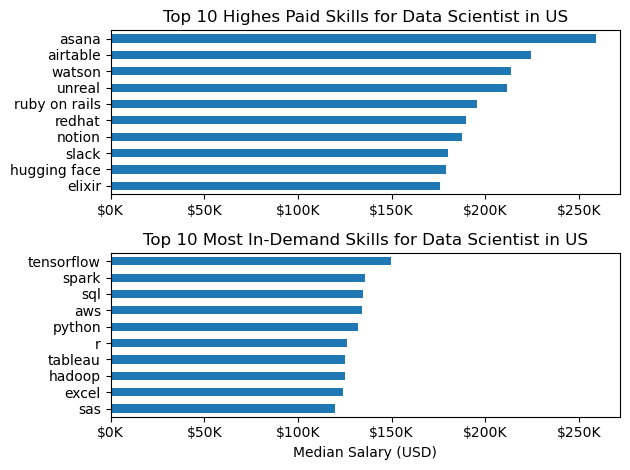

In [34]:
fig, ax=plt.subplots(2,1)

df_DS_US_top_pay [::-1].plot(kind="barh", y="median", ax=ax[0], legend=False)
ax[0].set_title("Top 10 Highes Paid Skills for Data Scientist in US")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

df_DS_US_skills[::-1].plot(kind="barh", y="median", ax=ax[1],legend=False)
ax[1].set_title("Top 10 Most In-Demand Skills for Data Scientist in US")
ax[1].set_xlabel("Median Salary (USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K' ))

ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()